In [4]:
import numpy as np
import matplotlib.pyplot as plt
import json

n_input = 784
n_e = 400
n_in_sqrt = int(np.sqrt(n_input))

thetaa = np.load('theta_A.npy', allow_pickle=True)

f = open('theta.json', 'w')
f.write(json.dumps(thetaa.tolist()))
f.close()


xeae = np.load('XeAe.npy')
xeae2 = xeae.reshape((n_input, n_e, 3))
xeae3 = xeae2[:, :, 2]

f = open('xeae.json', 'w')
f.write(json.dumps(xeae3.tolist()))
f.close()

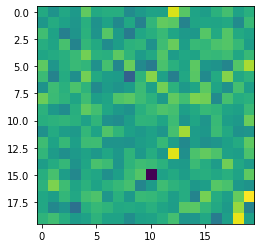

In [5]:
plt.imshow(thetaa.reshape((20, 20)))

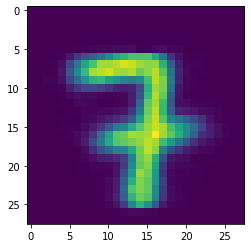

In [6]:
plt.imshow(xeae3[:, 0].reshape((n_in_sqrt, n_in_sqrt)))

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds

(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Softmax()
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

2023-02-08 21:52:56.931520: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-08 21:52:57.015355: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-08 21:52:57.015370: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-08 21:52:57.472230: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Epoch 1/6


2023-02-08 21:52:58.319218: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 21:52:58.319406: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 21:52:58.319592: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-08 21:52:58.319643: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-08 21:52:58.319687: W tensorflow/compiler/xl

469/469 [==============================] - 2s 2ms/step - loss: 0.3483 - sparse_categorical_accuracy: 0.9042 - val_loss: 0.1964 - val_sparse_categorical_accuracy: 0.9442
Epoch 2/6
469/469 [==============================] - 1s 1ms/step - loss: 0.1659 - sparse_categorical_accuracy: 0.9530 - val_loss: 0.1408 - val_sparse_categorical_accuracy: 0.9587
Epoch 3/6
469/469 [==============================] - 1s 1ms/step - loss: 0.1201 - sparse_categorical_accuracy: 0.9653 - val_loss: 0.1168 - val_sparse_categorical_accuracy: 0.9644
Epoch 4/6
469/469 [==============================] - 1s 1ms/step - loss: 0.0933 - sparse_categorical_accuracy: 0.9733 - val_loss: 0.1033 - val_sparse_categorical_accuracy: 0.9686
Epoch 5/6
469/469 [==============================] - 1s 1ms/step - loss: 0.0745 - sparse_categorical_accuracy: 0.9784 - val_loss: 0.0873 - val_sparse_categorical_accuracy: 0.9746
Epoch 6/6
469/469 [==============================] - 1s 1ms/step - loss: 0.0619 - sparse_categorical_accuracy: 0.98

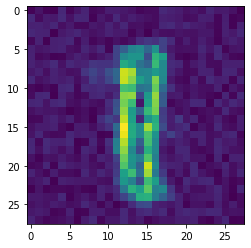

8


In [ ]:
%matplotlib inline
import time
from IPython.display import clear_output

x = xeae3.transpose((1, 0)).reshape((400, n_in_sqrt, n_in_sqrt))
# x = tf.constant(xeae3[:, 0])
# print(x.shape)
# print(x[3].shape)
# plt.imshow(xeae3[:, 3].reshape(n_in_sqrt, n_in_sqrt))
plt.imshow(x[0])
outputs = model(x)
labels = [int(tf.math.argmax(out)) for out in outputs]

f = open('neuron_labels.json', 'w')
f.write(json.dumps(labels))
f.close()
print(labels)
# print(len(labels))
for idx, out in enumerate(outputs):
    plt.imshow(x[idx])
    plt.show()
    val = labels[idx]
    print(val)
    time.sleep(3)
    clear_output()
# print(outputs)

In [2]:
import time
time.sleep(10)

In [2]:
!pip install tensorflow_datasets

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 8.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.5/146.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.0/223.0 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.4 MB/s eta 0:00:0000:0100:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21486 sha256=7a6323996da1adb05e08da67ead60e3bcbc153066667de1eb31ac69914145049
  Stored in directory: /home/soney/.cache/pip/wheels/54/4e/28/3ed0e1c8a752867445bab994d2340724928aa3ab059c57c8db
Successfully built promise
  Conside